# Analysis of Shopping Distance

In [8]:
import pandas as pd
import os
import csv
import seaborn as sns
import matplotlib.pyplot as plt

## Combining the distances calculated into one csv file

In [9]:
folder_path = '../data/raw/shopping_distance/'

combined_df = pd.DataFrame()

file_list = os.listdir(folder_path)

for file_name in file_list:
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        combined_df = pd.concat([combined_df, df], ignore_index=True)


In [10]:
relative_path = '../data/raw/merge_requirement/'
if not os.path.exists(relative_path):
    os.makedirs(relative_path)

In [11]:
combined_df.to_csv('../data/raw/merge_requirement/Driving_shop.csv', index=False)

In [12]:
sample_df = combined_df[combined_df['NearestShoppingDistance'] < 15]

## Scatter Plot

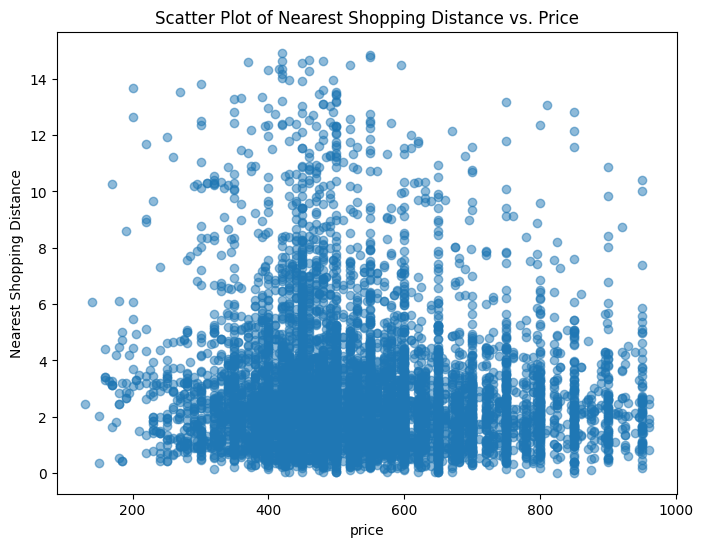

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(sample_df['price'], sample_df['NearestShoppingDistance'], alpha=0.5) 

plt.xlabel('price')
plt.ylabel('Nearest Shopping Distance')
plt.title('Scatter Plot of Nearest Shopping Distance vs. Price')
plt.savefig('../plots/Scatter Plot of Nearest Shopping Distance vs. Price.png')

plt.show()

## Box Plot whether Nearest Shop is within 4 km

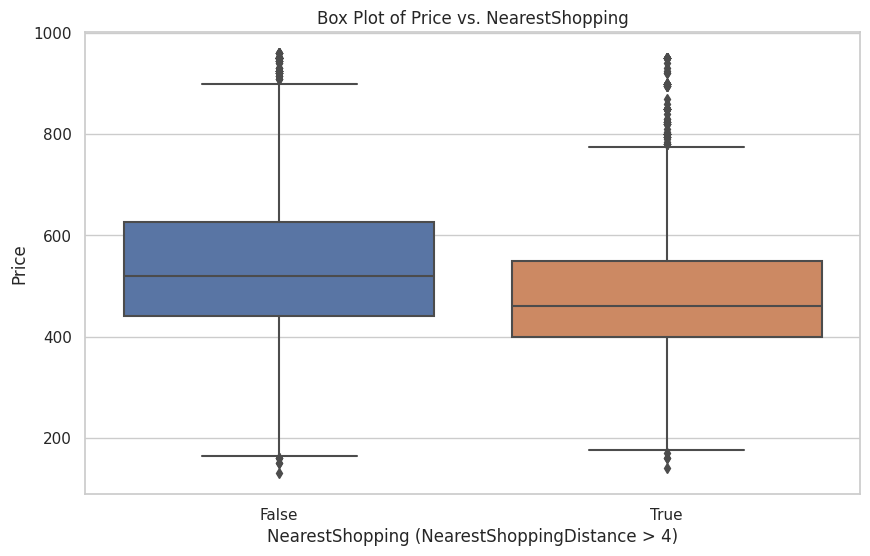

In [14]:
combined_df['NearestShopping'] = combined_df['NearestShoppingDistance'] > 4

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x='NearestShopping', y='price', data=combined_df)

plt.xlabel('NearestShopping (NearestShoppingDistance > 4)')
plt.ylabel('Price')
plt.title('Box Plot of Price vs. NearestShopping')

plt.savefig('../plots/boxplot_shop.png', dpi=300)

plt.show()